<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_matplotlib_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Pandas és a matplotlib csomag használata

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

2000-01-01    1.764052
2000-01-02    0.400157
2000-01-03    0.978738
2000-01-04    2.240893
2000-01-05    1.867558
                ...   
2002-09-22    0.412871
2002-09-23   -0.198399
2002-09-24    0.094192
2002-09-25   -1.147611
2002-09-26   -0.358114
Freq: D, Length: 1000, dtype: float64
----------
2000-01-01     1.764052
2000-01-02     2.164210
2000-01-03     3.142948
2000-01-04     5.383841
2000-01-05     7.251399
                ...    
2002-09-22   -43.646776
2002-09-23   -43.845175
2002-09-24   -43.750982
2002-09-25   -44.898593
2002-09-26   -45.256707
Freq: D, Length: 1000, dtype: float64


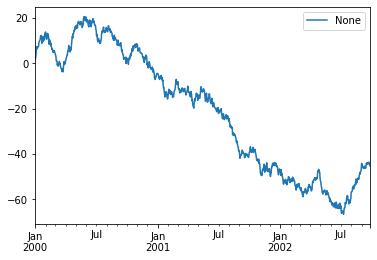

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(0)

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
print(ts)
ts = ts.cumsum()   ## commulált summa képzése
print('----------')
print(ts)
plt.figure();
ts.plot();
plt.legend(loc='best')

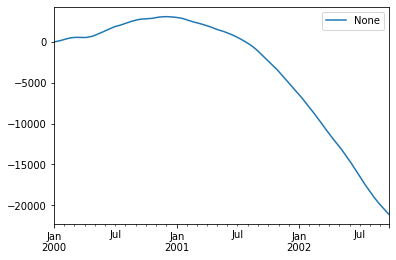

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])
ts = ts.cumsum()   ## commulált summa képzése
plt.figure()
ts.plot()
plt.legend(loc='best')

In [ ]:
## string művelket
s = df['col'].str.lower()
s = df['col'].str.upper()
s = df['col'].str.len()
df['col'] += 'suffix'          # append
df['col'] *= 2                 # duplicate
s = df['col1'] + df['col2']    # concatenate
s = df['col'].str.replace('old', 'new')  ## csere
df['b'] = df.a.str.extract('(pattern)')  ## mintakeresés

s = df['col'].str.contains('regex')
s = df['col'].str.startswith('regex')
s = df['col'].str.endswith('regex')
s = df['col1'].value_counts()
s = df['col1'].unique()
s = df['col1'].nunique()
df.groupby('Group')['ID'].nunique()
##---
df[df['A'] == 1]['B'].tolist() ## sűrés eredmény oszlopának listázása
##----
s = df['col1'].describe()
df1 = df.describe()
## ---
t = pd.Timestamp('2013-01-01')
t = pd.Timestamp('2013-01-01 21:15:06')
t = pd.Timestamp('2013-01-01 21:15:06.7')
p = pd.Period('2013-01-01', freq='M')

df[:10]           # same as df.head(10)
df[-10:]          # same as df.tail(10)
##---
kesz = df['col1'].shift(1) - df['col2']
kesz = df.str.lower()
kesz = df.apply(str.lower)
kesz = df.apply(lambda x: x ** 2)
kesz = df.assign(A3=df.A*df.A2, B3=5*df.B)
##---
kesz = df['col_name'].str.extract[r'[Aa-Zz]']
df['col_name'].str.replace('Replace this', 'With this')
df[df.str.contains('a')]              ## a betút tartalmazo elemek szűrése
df[df.str.startswith(('b', 'c'))]     ## b vagy c betűvel kezdődü elemek szűrése





##---

df.drop_duplicates(subset=['A'], inplace=True)

KeyError: 'col'

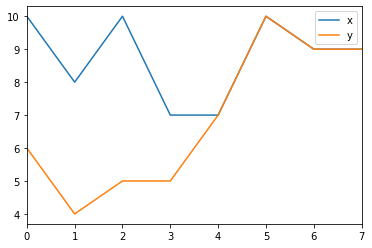

In [ ]:
df = pd.DataFrame({'x': [10, 8, 10, 7, 7, 10, 9, 9],
                   'y': [6, 4, 5, 5, 7, 10, 9, 9]})
df.plot()

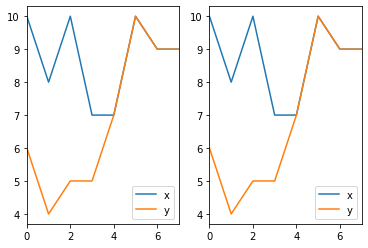

In [ ]:
plt.figure() # create a new figure
ax = plt.subplot(121) # create the left-side subplot
df.plot(ax=ax) # plot df1 on that subplot
ax = plt.subplot(122) # create the right-side subplot
df.plot(ax=ax) # and plot df2 there
plt.show() # show the plot

In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'a', 'b', 'b'],
                   'B': ['z', 'z', 'x', 'x', 'y', 'y'],
 'C': [2, 8, 1, 4, 3, 8],
 'D': [102, 98, 107, 104, 115, 87]})

print(df.groupby('A').mean())
print('----------------------------')
print(df.groupby(['A','B']).mean())
print('----------------------------')
print(df.groupby(['A','B']).agg(['count', 'mean']))
print('----------------------------')
print(pd.crosstab(df['A'], df['B']))
print('----------------------------')
'''
print(df.pivot(index='A', columns='B', values='C'))

print (df.pivot(index='A', columns='B', values='C')
 .reset_index()
 .rename_axis(None, axis=1)
 .fillna(0))
'''
print(df.pivot_table(values='C', index='A', columns='B', aggfunc='sum') )


          C      D
A                 
a  3.000000  103.0
b  6.333333  100.0
c  1.000000  107.0
----------------------------
       C      D
A B            
a x  4.0  104.0
  z  2.0  102.0
b y  5.5  101.0
  z  8.0   98.0
c x  1.0  107.0
----------------------------
        C          D     
    count mean count mean
A B                      
a x     1  4.0     1  104
  z     1  2.0     1  102
b y     2  5.5     2  101
  z     1  8.0     1   98
c x     1  1.0     1  107
----------------------------
B  x  y  z
A         
a  1  0  1
b  0  2  1
c  1  0  0
----------------------------
B    x     y    z
A                
a  4.0   NaN  2.0
b  NaN  11.0  8.0
c  1.0   NaN  NaN


In [ ]:
df2 = pd.DataFrame({'id_user':[1,2,3,4,4,5,5], 
'information':['phon','phon','phone','phone1','phone','phone1','phone'], 
'value': [1, '01.01.00', '01.02.00', 2, '01.03.00', 3, '01.04.00']})
df2.pivot(index='id_user', columns='information', values='value')

information,phon,phone,phone1
id_user,,,
1,1,NaN,NaN
2,01.01.00,NaN,NaN
3,NaN,01.02.00,NaN
4,NaN,01.03.00,2
5,NaN,01.04.00,3


In [ ]:
### Read & merge multiple CSV files (with the same structure) into one DF
import os
import glob
import pandas as pd
def get_merged_csv(flist, **kwargs):
     return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)
path = r'c:\Temp'
fmask = os.path.join(path, '*.csv')
df = get_merged_csv(glob.glob(fmask), index_col=None, usecols=['col1', 'col3'])
print(df.head())

pd.read_table('table.txt', delim_whitespace=True, skiprows=3, skipfooter=2, index_col=0)

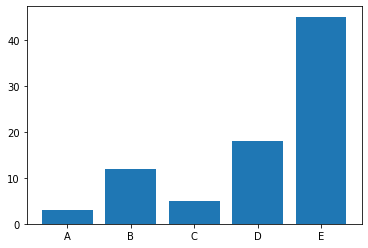

In [ ]:
%matplotlib inline / barplot 
# Libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Create dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(x_pos, bars)
 
# Show graphic
plt.show()

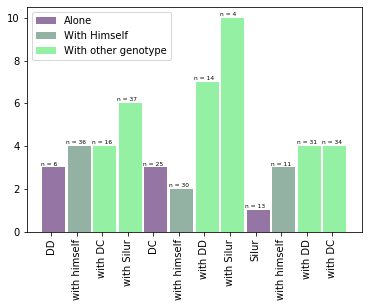

In [ ]:
%matplotlib inline
# library
import matplotlib.pyplot as plt
 
# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
bars3 = [4, 6, 7, 10, 4, 4]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
r3 = [3,4,7,8,11,12]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Alone')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='With Himself')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='With other genotype')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['DD', 'with himself', 'with DC', 'with Silur', 'DC', 'with himself', 'with DD', 'with Silur', 'Silur', 'with himself', 'with DD', 'with DC'], rotation=90)
 
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each bar
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)

# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()


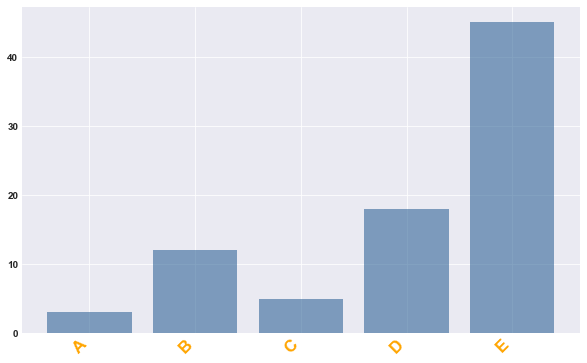

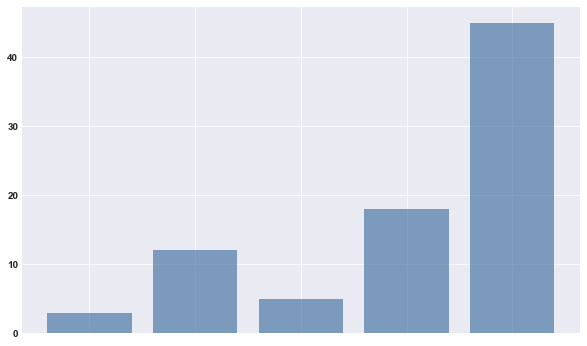

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Data set
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Basic plot
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()
 
# remove labels
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
plt.tick_params(labelbottom=False)
plt.show()

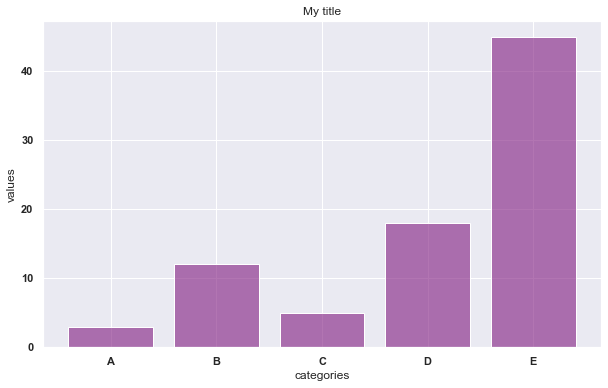

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

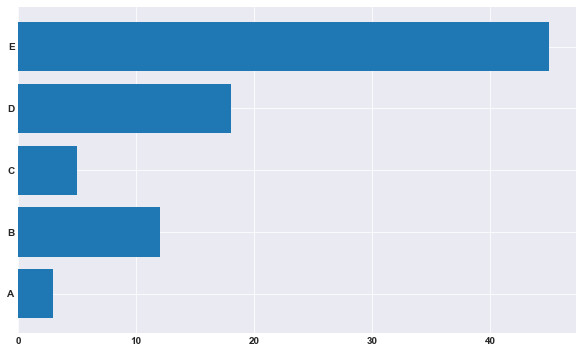

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

# create dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

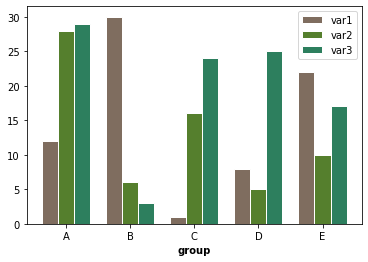

In [ ]:
# libraries  / Grouping
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

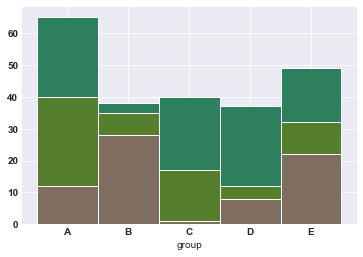

In [ ]:
# libraries // stacked barplot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

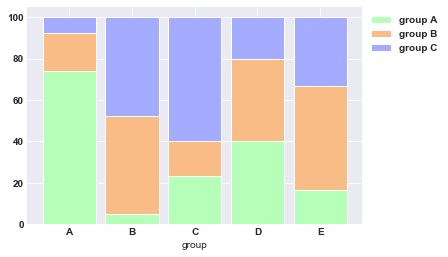

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')


# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="group C")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

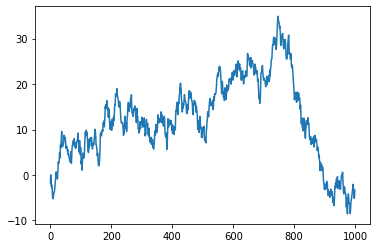

In [ ]:
# libraries  // Lineplot
import matplotlib.pyplot as plt
import numpy as np
 
# create data
values=np.cumsum(np.random.randn(1000,1))
 
# use the plot function
plt.plot(values)

# show the graph
plt.show()

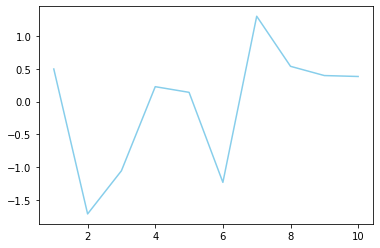

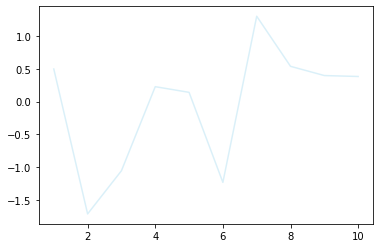

In [ ]:
# Libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.DataFrame({'x_values': range(1,11), 'y_values': np.random.randn(10) })

# Draw plot
plt.plot( 'x_values', 'y_values', data=df, color='skyblue')
plt.show()

# Draw line chart by modifiying transparency of the line
plt.plot( 'x_values', 'y_values', data=df, color='skyblue', alpha=0.3)

# Show plot
plt.show()

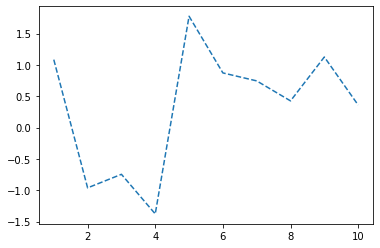

In [ ]:
# Libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.DataFrame({'x_values': range(1,11), 'y_values': np.random.randn(10) })

# Draw line chart with dashed line
plt.plot( 'x_values', 'y_values', data=df, linestyle='dashed')

# Show graph
plt.show()

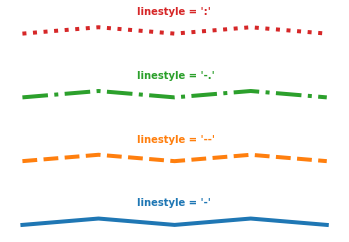

In [ ]:
plt.plot( [1,1.1,1,1.1,1], linestyle='-' , linewidth=4)
plt.text(1.5, 1.3, "linestyle = '-' ", horizontalalignment='left', size='medium', color='C0', weight='semibold')
plt.plot( [2,2.1,2,2.1,2], linestyle='--' , linewidth=4 )
plt.text(1.5, 2.3, "linestyle = '--' ", horizontalalignment='left', size='medium', color='C1', weight='semibold')
plt.plot( [3,3.1,3,3.1,3], linestyle='-.' , linewidth=4 )
plt.text(1.5, 3.3, "linestyle = '-.' ", horizontalalignment='left', size='medium', color='C2', weight='semibold')
plt.plot( [4,4.1,4,4.1,4], linestyle=':' , linewidth=4 )
plt.text(1.5, 4.3, "linestyle = ':' ", horizontalalignment='left', size='medium', color='C3', weight='semibold')
plt.axis('off')
plt.show()

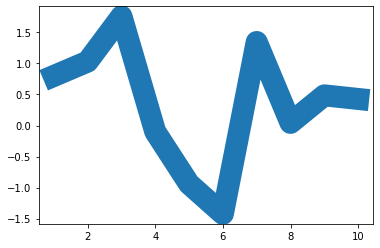

In [ ]:
# Libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.DataFrame({'x_values': range(1,11), 'y_values': np.random.randn(10) })

# Modify line width of the graph
plt.plot( 'x_values', 'y_values', data=df, linewidth=22)

# Show graph
plt.show()

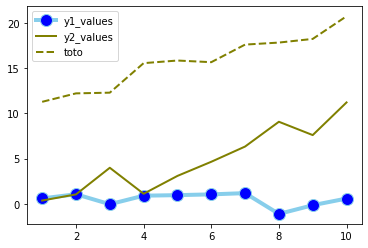

In [ ]:
# libraries /multiplike line
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

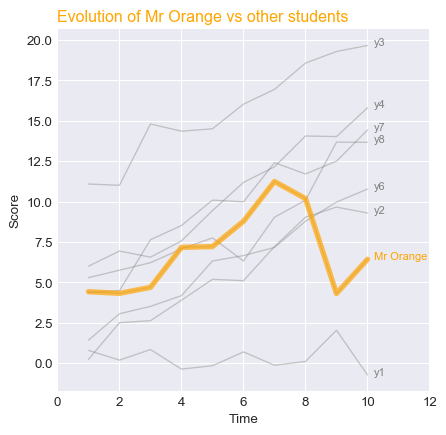

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })

# Change the style of plot
plt.style.use('seaborn-darkgrid')

# set figure size
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# plot multiple lines
for column in df.drop('x', axis=1):
    plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# Change x axis limit
plt.xlim(0,12)
 
# Let's annotate the plot
num=0
for i in df.values[9][1:]:
    num+=1
    name=list(df)[num]
    if name != 'y5':
        plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')

# And add a special annotation for the group we are interested in
plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")

# Show the graph
plt.show()

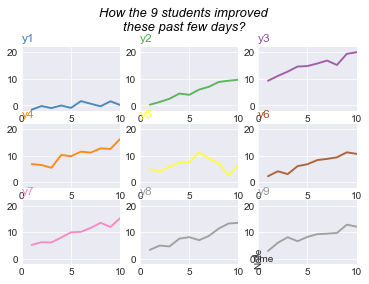

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for every chart
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()

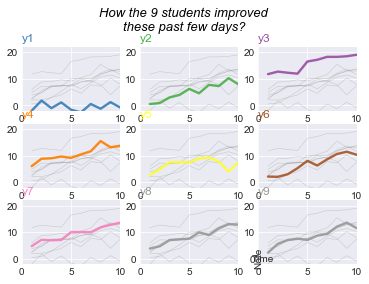

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every group, but discrete
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for every chart
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()

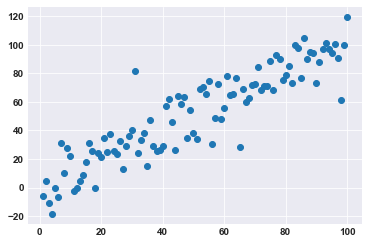

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Create a dataset:
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*15+range(1,101) })
 
# plot
plt.plot( 'x_values', 'y_values', data=df, linestyle='none', marker='o')
plt.show()

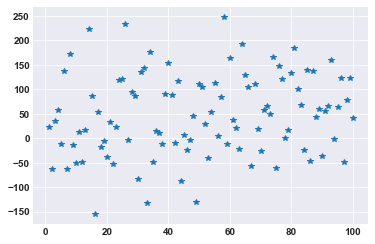

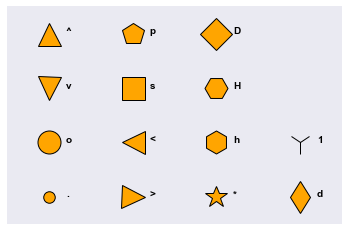

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# dataset
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*80+range(1,101) })

# === Left figure:
plt.plot( 'x_values', 'y_values', data=df, linestyle='none', marker='*')
plt.show()
 
# === Right figure:
all_poss=['.','o','v','^','>','<','s','p','*','h','H','D','d','1','','']
 
# to see all possibilities:
# markers.MarkerStyle.markers.keys()
 
# set the limit of x and y axis:
plt.xlim(0.5,4.5)
plt.ylim(0.5,4.5)
 
# remove ticks and values of axis:
plt.xticks([])
plt.yticks([])
#plt.set_xlabel(size=0)
 
# Make a loop to add markers one by one
num=0
for x in range(1,5):
    for y in range(1,5):
        num += 1
        plt.plot(x,y,marker=all_poss[num-1], markerfacecolor='orange', markersize=23, markeredgecolor="black")
        plt.text(x+0.2, y, all_poss[num-1], horizontalalignment='left', size='medium', color='black', weight='semibold')

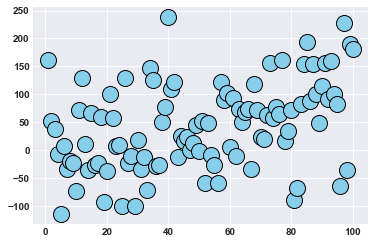

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# dataset
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*80+range(1,101) })

# scatter plot
plt.plot( 'x_values', 'y_values', data=df, linestyle='none', markerfacecolor='skyblue', marker="o", markeredgecolor="black", markersize=16)
plt.show()

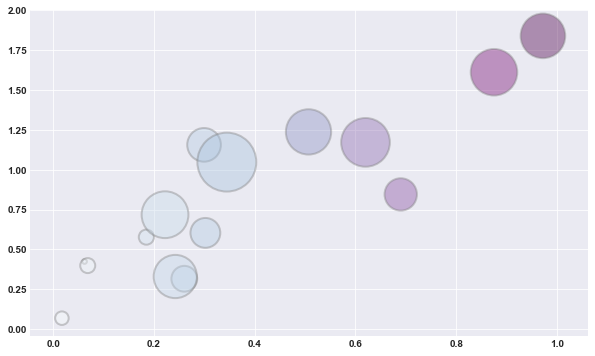

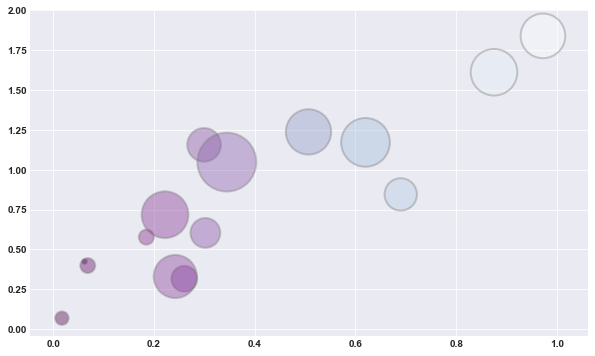

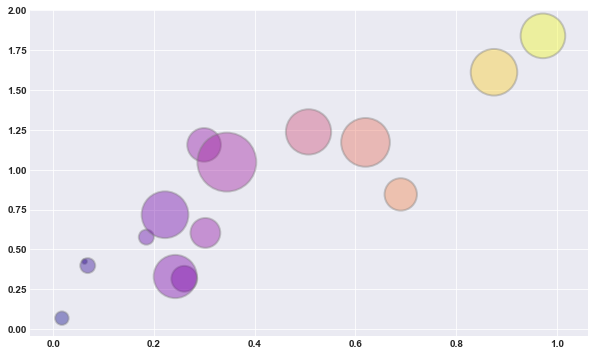

In [ ]:
# libraries
from matplotlib import pyplot as plt
import numpy as np
 
# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# call pallette in cmap
plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu", alpha=0.4, edgecolors="grey", linewidth=2)
plt.show()
 
# You can reverse it by adding "_r" to the end:
plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu_r", alpha=0.4, edgecolors="grey", linewidth=2)
plt.show()

# OTHER: viridis / inferno / plasma / magma
plt.scatter(x, y, s=z*2000, c=x, cmap="plasma", alpha=0.4, edgecolors="grey", linewidth=2)
plt.show()

In [ ]:
# libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
# Data
df = sns.load_dataset('iris')
 
# We use the species column to choose the color. We need to make a numerical vector from it:
df['species']=pd.Categorical(df['species'])
df['species'].cat.codes
 
# Scatter plot
plt.scatter(df['sepal_length'], df['sepal_width'], s=62, c=df['species'].cat.codes, cmap="Set1", alpha=0.9, linewidth=0)
plt.show()

URLError: <urlopen error [WinError 10054] A létező kapcsolatot a távoli állomás kényszerítetten bezárta>

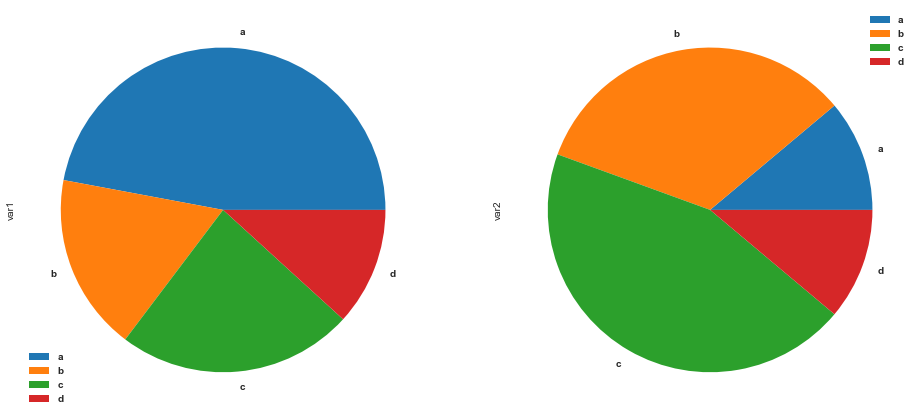

In [ ]:
# library
import pandas as pd
import matplotlib.pyplot as plt
 
# --- dataset 2: 3 columns and rownames
df = pd.DataFrame({'var1':[8,3,4,2], 'var2':[1,3,4,1]}, index=['a', 'b', 'c', 'd'] )
 
# make the multiple plot
df.plot(kind='pie', subplots=True, figsize=(16,8))

# show the plot
plt.show()

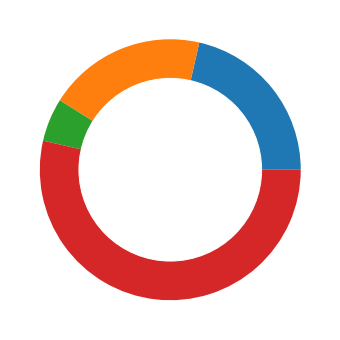

In [ ]:
# library
import matplotlib.pyplot as plt
 
# create data
size_of_groups=[12,11,3,30]
 
# Create a pie plot
plt.pie(size_of_groups)
#plt.show()
 
# add a white circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# show the graph
plt.show()

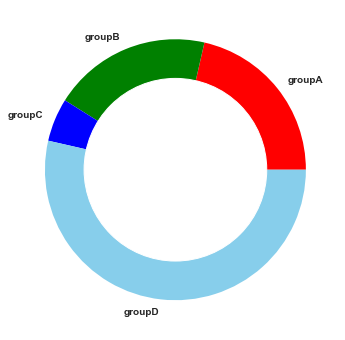

In [ ]:
# library
import matplotlib.pyplot as plt
 
# create data
names = ['groupA', 'groupB', 'groupC', 'groupD']
size = [12,11,3,30]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','green','blue','skyblue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

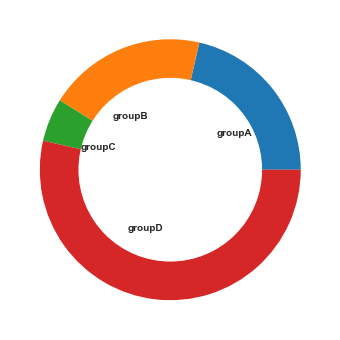

In [ ]:
# library
import matplotlib.pyplot as plt

# create data
names = ['groupA', 'groupB', 'groupC', 'groupD']
size = [12,11,3,30]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Label distance: gives the space between labels and the center of the pie
plt.pie(size, labels=names, labeldistance=0.45)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

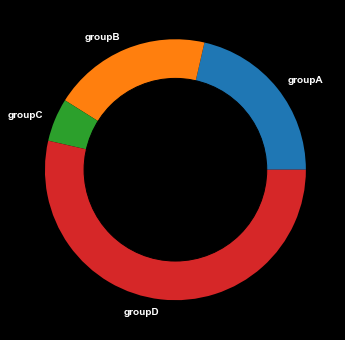

In [ ]:
# library
import matplotlib.pyplot as plt
 
# Data
names = 'groupA', 'groupB', 'groupC', 'groupD',
size = [12,11,3,30]
 
# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('black')
 
# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Create a circle at the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
 
# Pieplot + circle on it
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


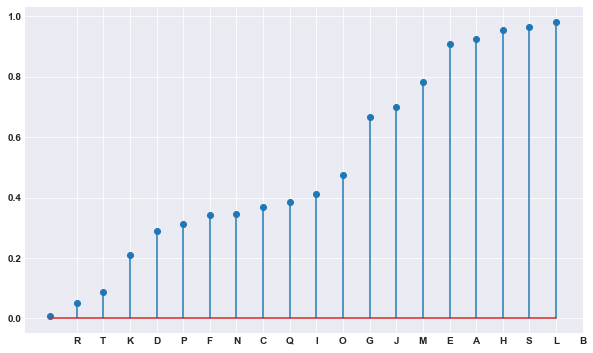

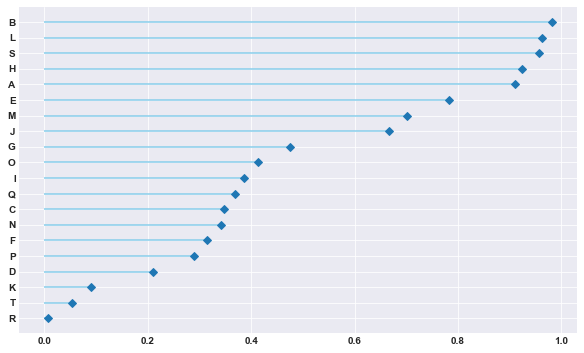

In [ ]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# Make the plot
plt.stem(ordered_df['values'])
plt.xticks( my_range, ordered_df['group'])
plt.show()
 
# Horizontal version
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D")
plt.yticks(my_range, ordered_df['group'])
plt.show()

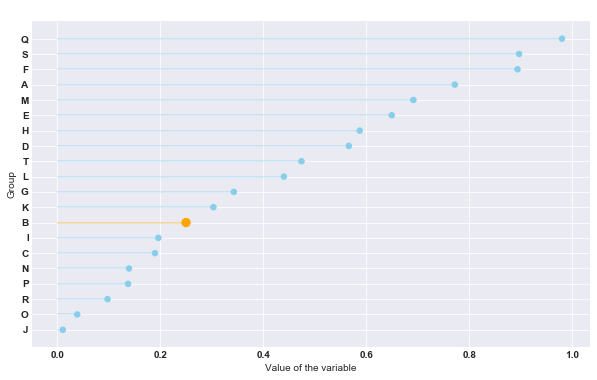

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it based on values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# Create a color if the group is "B"
my_color=np.where(ordered_df ['group']=='B', 'orange', 'skyblue')
my_size=np.where(ordered_df ['group']=='B', 70, 30)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['values'], my_range, color=my_color, s=my_size, alpha=1)
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

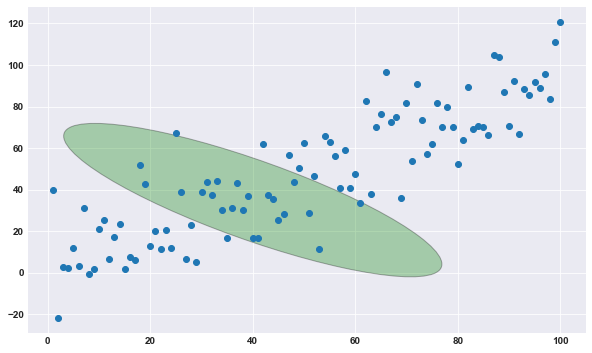

In [ ]:
# libraries
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x_pos': range(1,101), 'y_pos': np.random.randn(100)*15+range(1,101) })
 
# Plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot( 'x_pos', 'y_pos', data=df, linestyle='none', marker='o')
ax1.add_patch(
patches.Ellipse(
(40, 35), # (x,y)
30, # width
100, # height
45, # radius
alpha=0.3, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid'
)
)

# Show the graph
plt.show()

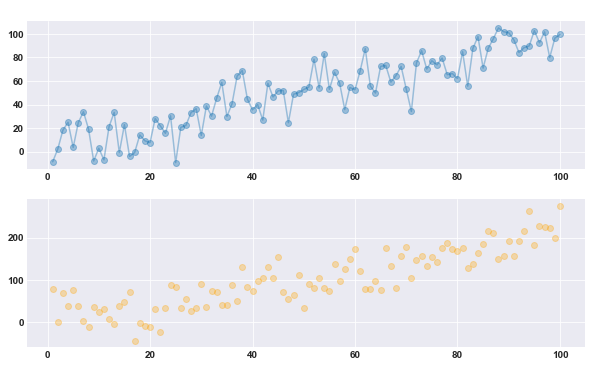

In [ ]:
# libraries and data
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*15+range(1,101), 'z_values': (np.random.randn(100)*15+range(1,101))*2 })
 
# fist line:
plt.subplot(211)
plt.plot( 'x_values', 'y_values', data=df, marker='o', alpha=0.4)
plt.title("A subplot with 2 lines")
 
# second line
plt.subplot(212)
plt.plot( 'x_values','z_values', data=df, linestyle='none', marker='o', color="orange", alpha=0.3)

# Show the graph
plt.show()

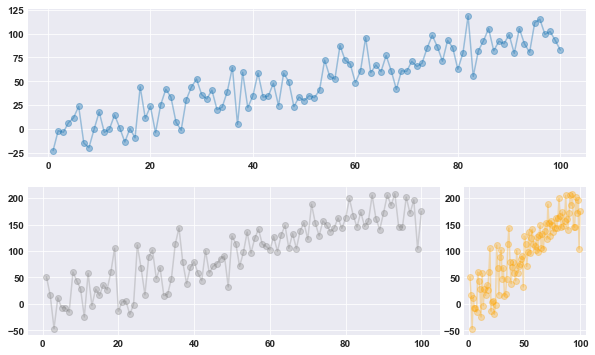

In [ ]:
# libraries and data
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*15+range(1,101), 'z_values': (np.random.randn(100)*15+range(1,101))*2 })
 
# 4 columns and 2 rows
# The first plot is on line 1, and is spread all along the 4 columns
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=4)
ax1.plot( 'x_values', 'y_values', data=df, marker='o', alpha=0.4)

# The second one is on column2, spread on 3 columns
ax2 = plt.subplot2grid((2, 4), (1, 0), colspan=3)
ax2.plot( 'x_values','z_values', data=df, marker='o', color="grey", alpha=0.3)

# The last one is spread on 1 column only, on the 4th column of the second line.
ax3 = plt.subplot2grid((2, 4), (1, 3), colspan=1)
ax3.plot( 'x_values','z_values', data=df, marker='o', color="orange", alpha=0.3)

# Show the graph
plt.show()

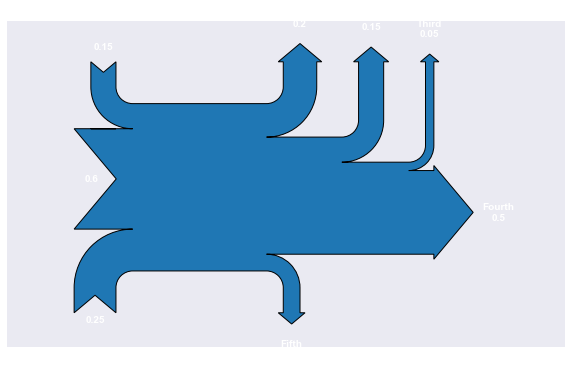

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
# basic sankey chart
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10], labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], orientations=[-1, 1, 0, 1, 1, 1, 0,-1]).finish()
plt.title("Sankey diagram with default settings")
plt.show()

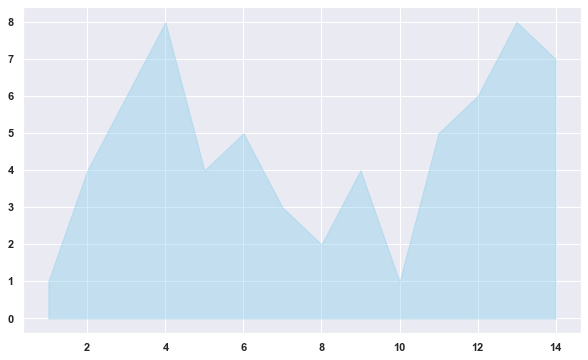

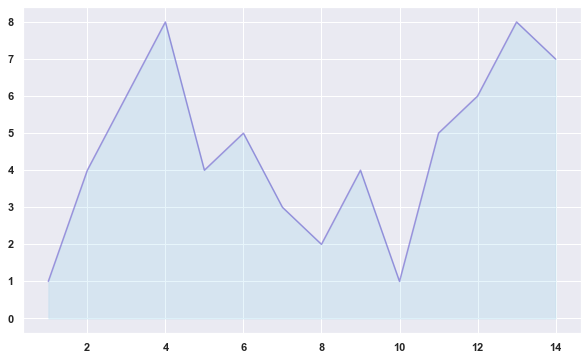

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create data
x=range(1,15)
y=[1,4,6,8,4,5,3,2,4,1,5,6,8,7]
 
# Change the color and its transparency
plt.fill_between( x, y, color="skyblue", alpha=0.4)

# Show the graph
plt.show()
 
# Same, but add a stronger line on top (edge)
plt.fill_between( x, y, color="skyblue", alpha=0.2)
plt.plot(x, y, color="Slateblue", alpha=0.6)
# See the line plot function to learn how to customize the plt.plot function

# Show the graph
plt.show()

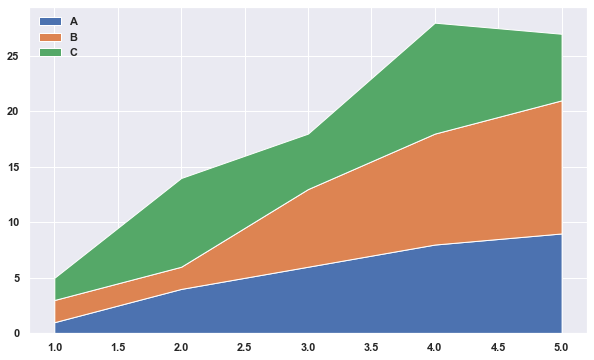

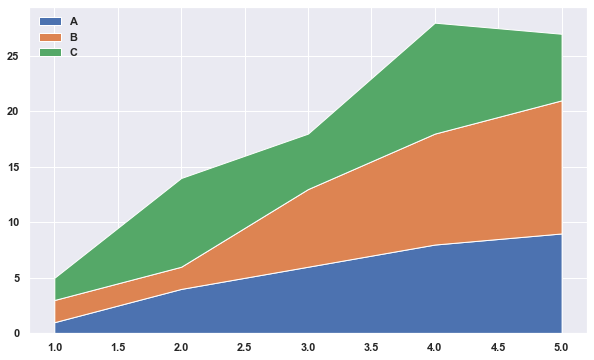

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# --- FORMAT 1
 
# Your x and y axis
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()
 
# --- FORMAT 2
x=range(1,6)
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]
 
# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()

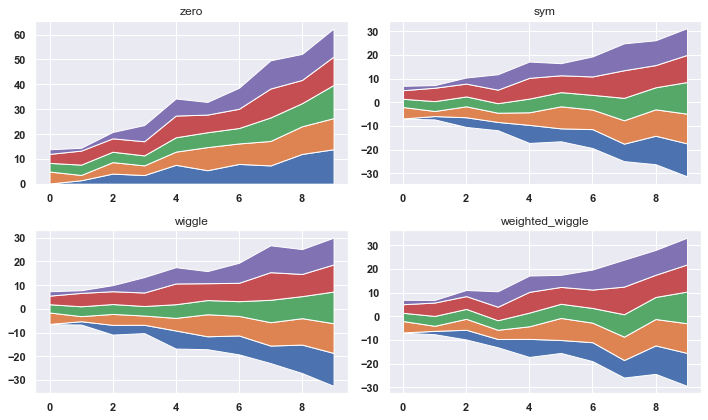

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Create data
X = np.arange(0, 10, 1)
Y = X + 5 * np.random.random((5, X.size))
 
# There are 4 types of baseline we can use:
baseline = ["zero", "sym", "wiggle", "weighted_wiggle"]
 
# Let's make 4 plots, 1 for each baseline
for n, v in enumerate(baseline):
    if n<3 :
        plt.tick_params(labelbottom='off')
    plt.subplot(2 ,2, n + 1)
    plt.stackplot(X, *Y, baseline=v)
    plt.title(v)
    plt.tight_layout()

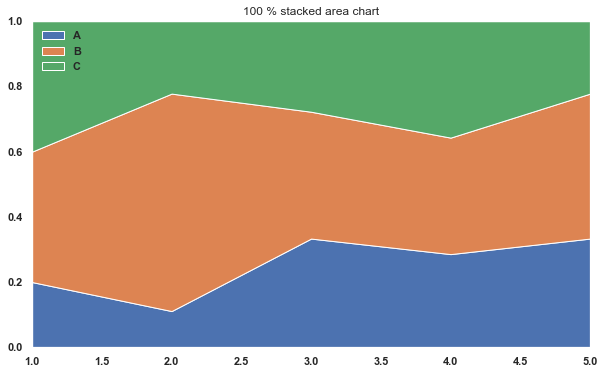

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Make data
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

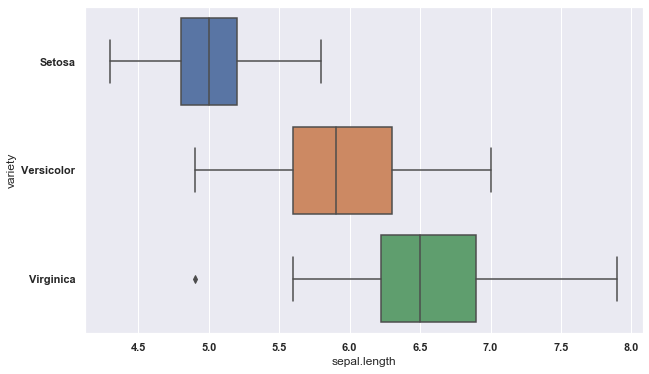

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset('iris')
df = pd.read_csv(r'c:\Users\KECSKE~1\Downloads\iris2.csv')

sns.boxplot(y=df["variety"], x=df["sepal.length"])
plt.show()

In [ ]:
print(df.head(15))


    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8         

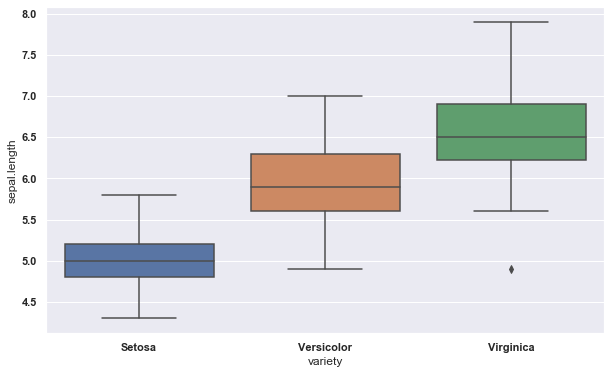

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
#df = sns.load_dataset('iris')
df = pd.read_csv(r'c:\Users\KECSKE~1\Downloads\iris2.csv')

sns.boxplot(x=df["variety"], y=df["sepal.length"])
plt.show()

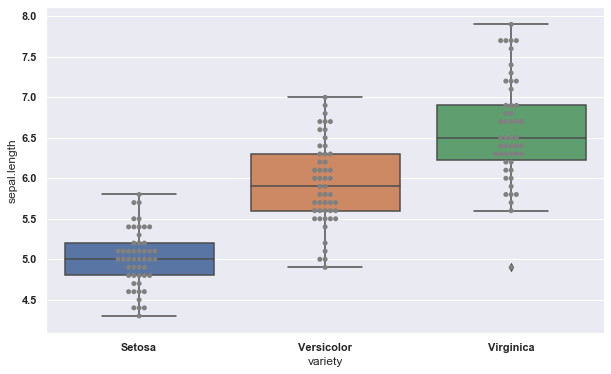

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
#df = sns.load_dataset('iris')
df = pd.read_csv(r'c:\Users\KECSKE~1\Downloads\iris2.csv')

# Usual boxplot
ax = sns.boxplot(x='variety', y='sepal.length', data=df)
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(x='variety', y='sepal.length', data=df, color="grey")
plt.show()

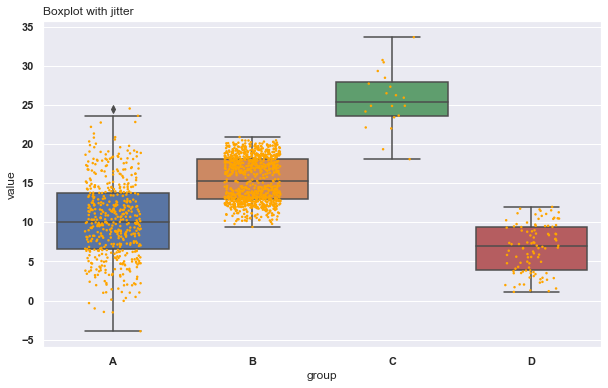

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)

# boxplot
ax = sns.boxplot(x='group', y='value', data=df)
# add stripplot
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

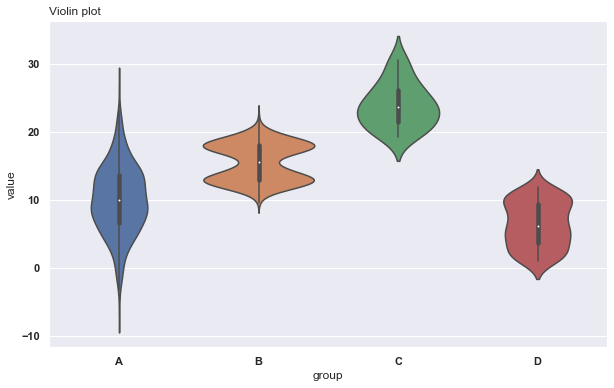

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)

# plot violin chart
sns.violinplot( x='group', y='value', data=df)

# add title
plt.title("Violin plot", loc="left")

# show the graph
plt.show()

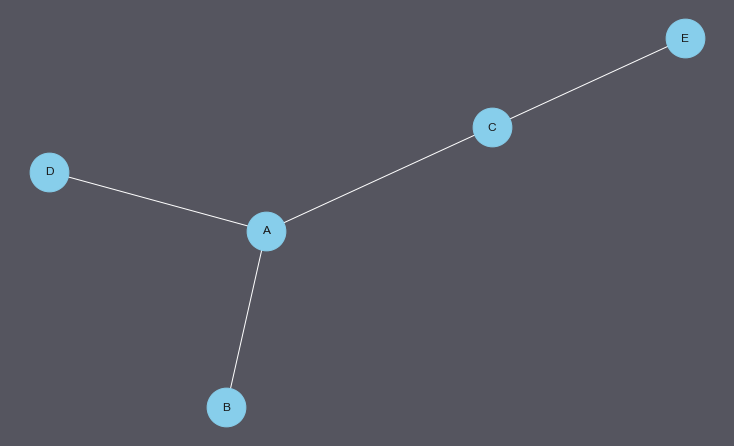

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
fig = plt.figure()
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='white')
fig.set_facecolor("#55555F")
 
# If you want to save the figure to png:
# plt.savefig('yourname.png', facecolor=fig.get_facecolor() )

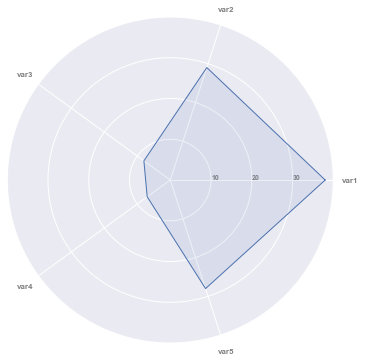

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, stopwords=["Python", "Matplotlib"]).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image    # to import the image
 
# Create a list of word (https://en.wikipedia.org/wiki/Data_visualization)
text=("Data visualization or data visualisation is viewed by many disciplines as a modern equivalent of visual communication. It involves the creation and study of the visual representation of data, meaning information that has been abstracted in some schematic form, including attributes or variables for the units of information A primary goal of data visualization is to communicate information clearly and efficiently via statistical graphics, plots and information graphics. Numerical data may be encoded using dots, lines, or bars, to visually communicate a quantitative message.[2] Effective visualization helps users analyze and reason about data and evidence. It makes complex data more accessible, understandable and usable. Users may have particular analytical tasks, such as making comparisons or understanding causality, and the design principle of the graphic (i.e., showing comparisons or showing causality) follows the task. Tables are generally used where users will look up a specific measurement, while charts of various types are used to show patterns or relationships in the data for one or more variables")
 
# Load the image (http://python-graph-gallery.com/wp-content/uploads/wave.jpg)
wave_mask = np.array(Image.open( "wave.jpg"))
 
# Create the wordcloud object
wordcloud = WordCloud(mask=wave_mask).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()